### Importing the dataset

In [1]:
import pandas as pd
file_path = "../data/dataset/OR_AE2_Project_Adjusted.xlsx"
df_original = pd.read_excel(file_path, engine='openpyxl')
df_original.head()

,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month,Number_Of_Attendances
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,2,1
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3,2
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,5,3
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,6,2


### Preprocessing

Each row represents a class of patients who share the same covariates. The number of patients sharing these values is stored in the variable 'Number_Of_Attendances'. We therefore create a new, extended dataset where each row corresponds to a single patient by replicating each row according to the value stored in 'Number_Of_Attendances'. We then remove this variable from the dataset.

In [3]:
df = df_original.loc[df_original.index.repeat(df_original['Number_Of_Attendances'])].reset_index(drop=True)
df = df.drop(columns=['Number_Of_Attendances'])
df.head()

,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,2
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4


### Handling with Categorical Variables

The following code transforms two categorical variables (Driving_Time_mins and Wait_Time) into numerical variables with uniformly distributed values within specified ranges

In [4]:
import numpy as np

range_mapping = {
    '00-29': (0, 29),
    '30-59': (30, 59),
    '60-89': (60, 89),
    '90-119': (90, 119),
    '120-149': (120, 149),
    '150-179': (150, 179),
    '180-209': (180, 209),
    '210-239': (210, 239),
    '240-269': (240, 269),
    '270-299': (270, 299),
    '300-329': (300, 329),
    '360+': (360, 420)
}

time_mapping = {
    '00 to 05': (0, 5),
    '05 to 10': (5, 10),
    '10 to 15': (10, 15),
    '15 to 20': (15, 20),
    '20 to 25': (20, 25),
    '25 to 30': (25, 30),
    '30 to 35': (30, 35),
    '35 to 40': (35, 40),
    '40 to 45': (40, 45),
    '45 to 50': (45, 50),
    '50 to 55': (50, 55),
    '55 to 60': (55, 60),
    '60 to 65': (60, 65),
    '65 to 70': (65, 70),
    '70 to 75': (70, 75),
    '75 to 80': (75, 80),
    '80 to 85': (80, 85),
    '85 to 90': (85, 90)
}

def random_uniform_from_range(value, mapping):
    if pd.isna(value) or value not in mapping:
        return np.nan
    low, high = mapping[value]
    return np.random.randint(low, high + 1) 


df['Driving_Time_mins'] = df['Driving_Time_mins'].apply(lambda x: random_uniform_from_range(x, time_mapping))
df['Wait_Time'] = df['Wait_Time'].apply(lambda x: random_uniform_from_range(x, range_mapping))
df.head()


,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,2,New - unplanned,20-39,15,1,2
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,3,New - unplanned,20-39,0,1,3
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,2,New - unplanned,20-39,14,1,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,1,New - unplanned,20-39,2,1,4
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,4,New - unplanned,20-39,9,1,4


In [5]:
df['Total_Time'] = df['Wait_Time'] + df['Driving_Time_mins']

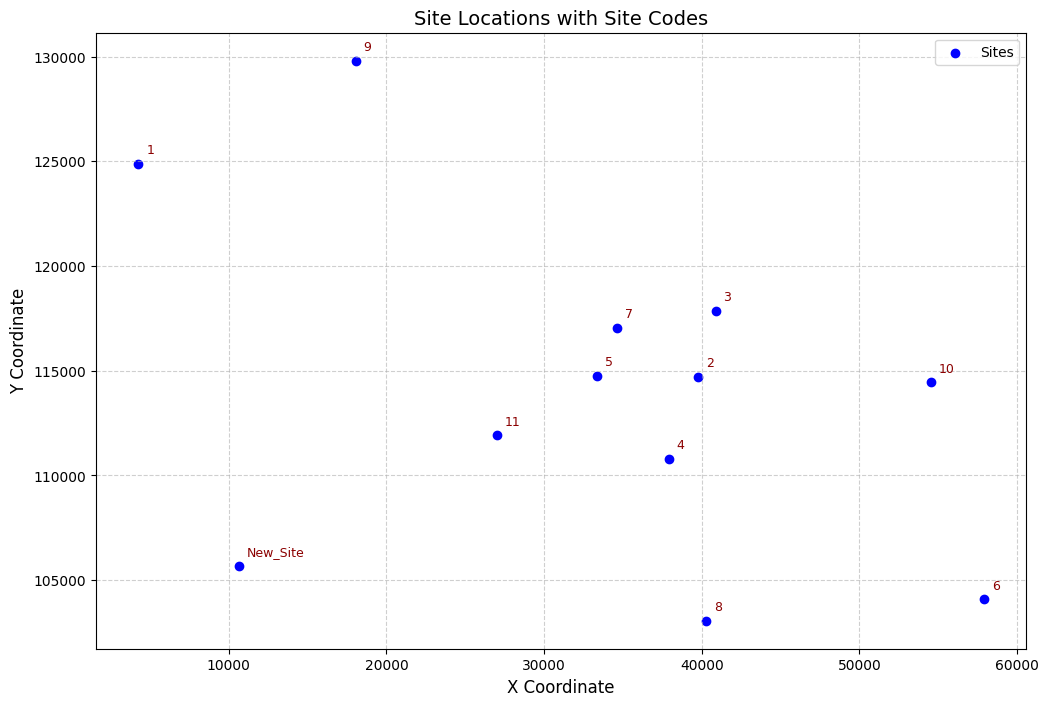

In [40]:
import matplotlib.pyplot as plt

# Extract site coordinates and codes
x_coords = sites['Site_X']
y_coords = sites['Site_Y']
site_codes = sites['Site_Code']

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(x_coords, y_coords, c='blue', marker='o', label='Sites')

# Add labels for each site
for i, code in enumerate(site_codes):
    plt.text(x_coords[i] + 500, y_coords[i] + 500, code, fontsize=9, color='darkred')

# Add plot decorations
plt.title('Site Locations with Site Codes', fontsize=14)
plt.xlabel('X Coordinate', fontsize=12)
plt.ylabel('Y Coordinate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


## Find the Average Total Time Decrease

In [35]:
# Campionamento di 200,000 osservazioni
df_sampled = df.sample(n=20000, random_state=42).reset_index(drop=True)

# Group by 'Site_Code', 'Site_X', 'Site_Y' and compute required metrics
grouped = df_sampled.groupby(['Site_Code', 'Site_X', 'Site_Y'])['Total_Time']

# Aggregate the data and include the count of rows in each group
site_summary = grouped.agg(
    Total_Time_Sum='sum',
    Total_Time_Mean='mean'
).reset_index()

site_summary['Row_Count'] = grouped.size().values

site_summary

,Site_Code,Site_X,Site_Y,Total_Time_Sum,Total_Time_Mean,Row_Count
0,1,4258,124892,298914,189.786667,1575
1,2,39785,114688,574292,181.050441,3172
2,3,40877,117868,44333,81.195971,546
3,4,37920,110782,280749,134.265423,2091
4,5,33369,114746,438069,176.002009,2489
5,6,57894,104081,137258,190.901252,719
6,7,34629,117035,275112,186.012170,1479
7,8,40269,103066,359850,180.466399,1994
8,9,18043,129799,15639,146.158879,107
9,10,54562,114442,163054,187.850230,868


In [42]:
# Campionamento di 200,000 osservazioni
df_sampled = df.sample(n=20000, random_state=50).reset_index(drop=True)

# Aggiunta del nuovo sito utilizzando pd.concat
new_site = pd.DataFrame({
    'Site_Code': ['New_Site'],
    'Site_X': [10640.01507538], 
    'Site_Y': [105690.53768844], 
})

second_new_site = pd.DataFrame({
    'Site_Code': ['Second_New_Site'],
    'Site_X': [33537],
    'Site_Y': [111593] 
})

sites = pd.concat([df_sampled[['Site_Code', 'Site_X', 'Site_Y']].drop_duplicates(), new_site], ignore_index=True)
sites = pd.concat([sites, second_new_site], ignore_index=True)

# Funzione per calcolare la distanza euclidea
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Calcolo della distanza tra ciascun paziente e i siti
distances = []
for i, patient in df_sampled.iterrows():
    if i % 25000 == 0 & i != 0:
        print(f"Row {i}")
    distances.append([
        euclidean_distance(patient['Pat_X'], patient['Pat_Y'], site['Site_X'], site['Site_Y']) 
        for _, site in sites.iterrows()
    ])

# Identificazione del sito più vicino
df_sampled['Nearest_Site_Index'] = [np.argmin(d) for d in distances]
df_sampled['Nearest_Site_Code'] = df_sampled['Nearest_Site_Index'].apply(lambda i: sites.iloc[i]['Site_Code'])

# Raggruppamento per sito per calcolare la somma del total time
site_total_time = df_sampled.groupby('Nearest_Site_Code')['Total_Time'].sum().reset_index()

# Rinominare le colonne per chiarezza
site_total_time.columns = ['Site_Code', 'New_Total_Time_Sum']

old_avg_tt = site_summary["Total_Time_Sum"].sum() / site_summary["Row_Count"].sum()

new_avg_tt = site_total_time["New_Total_Time_Sum"][:11].sum() / site_summary["Row_Count"].sum()

print((old_avg_tt - new_avg_tt)/old_avg_tt)

0.10338967116799065


176.809985


171.972555


0     137687
1     284506
2      48118
3     191466
4     224775
5      65299
6     134063
7     183602
8      10207
9      82842
10    449377
Name: Row_Count, dtype: int64

In [18]:
# Merge the new total time data with the original site summary
merged_summary = site_summary.merge(
    site_total_time,
    on='Site_Code',
    how='left'
)

# Compute the new average wait time for the original sites
merged_summary['New_Avg_Wait_Time'] = merged_summary['New_Total_Time_Sum'] / merged_summary['Row_Count']

# Exclude the new site from the results
original_sites_summary = merged_summary[merged_summary['Site_Code'] != 'New_Site']

# Display the updated averages
print(original_sites_summary[['Site_Code', 'Total_Time_Mean', 'New_Avg_Wait_Time']])


   Site_Code  Total_Time_Mean  New_Avg_Wait_Time
0          1       187.730142          15.786741
1          2       180.958989           9.345775
2          3        82.895777          61.734361
3          4       134.673650          21.715694
4          5       178.108682          14.549558
5          6       185.019572          37.579213
6          7       182.542372          32.302097
7          8       185.385693          13.640952
8          9       160.212991         104.548545
9         10       187.919316          31.253772
10        11       191.179146          13.837081
